In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_raw = pd.read_csv("my_movies.csv")
df_raw

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df = df_raw.drop(columns = ["V1", "V2", "V3", "V4", "V5"], axis = 1)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
freq_movies = apriori(df, min_support=0.05, use_colnames=True)
# freq_movies

/Users/hari/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
rules = association_rules(freq_movies, metric="lift", min_threshold=0.5)
# rules

In [6]:
min_sup = np.arange(0.1,0.5,0.05)
threshld = np.arange(0.5,2.0,0.25)

In [7]:
op_lift = pd.DataFrame({"Minimum Support": [0.05],
                     "Metric": ["Lift"],
                     "Minimum Threshold": [0.5],
                     "Number of Rules": rules.shape[0]})
cols = op_lift.columns

In [8]:
warnings.filterwarnings("ignore")
for i in min_sup:
    for j in threshld:
        freq_movies = apriori(df, min_support=i, use_colnames=True)
        rules = association_rules(freq_movies, metric="lift", min_threshold=j)
        new_row = pd.Series([i, "Lift", j, rules.shape[0]], index=cols)
        op_lift = op_lift.append(new_row, ignore_index=True)
op_lift.head(2)

,Minimum Support,Metric,Minimum Threshold,Number of Rules
0,0.05,Lift,0.5,250
1,0.10,Lift,0.5,250


In [9]:
op_sup = pd.DataFrame({"Minimum Support": [0.05],
                     "Metric": ["Support"],
                     "Minimum Threshold": [0.5],
                     "Number of Rules": rules.shape[0]})
cols = op_sup.columns

In [10]:
warnings.filterwarnings("ignore")
for i in min_sup:
    for j in threshld:
        freq_movies = apriori(df, min_support=i, use_colnames=True)
        rules = association_rules(freq_movies, metric="lift", min_threshold=j)
        new_row = pd.Series([i, "Support", j, rules.shape[0]], index=cols)
        op_sup = op_sup.append(new_row, ignore_index=True)
op_sup.head(2)

,Minimum Support,Metric,Minimum Threshold,Number of Rules
0,0.05,Support,0.5,0
1,0.10,Support,0.5,250


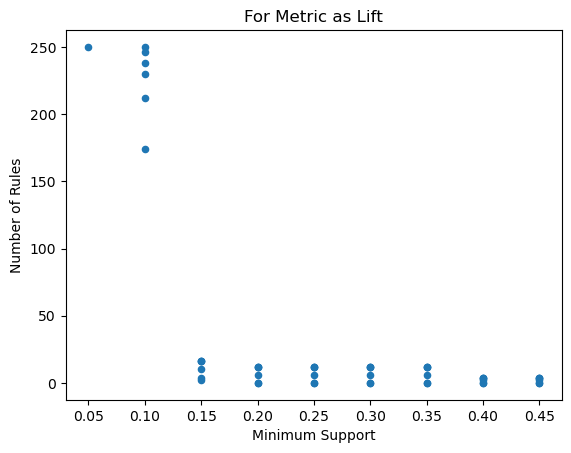

In [11]:
op_lift.plot(x = "Minimum Support", y = "Number of Rules", kind = 'scatter')
plt.title("For Metric as Lift")
plt.show()

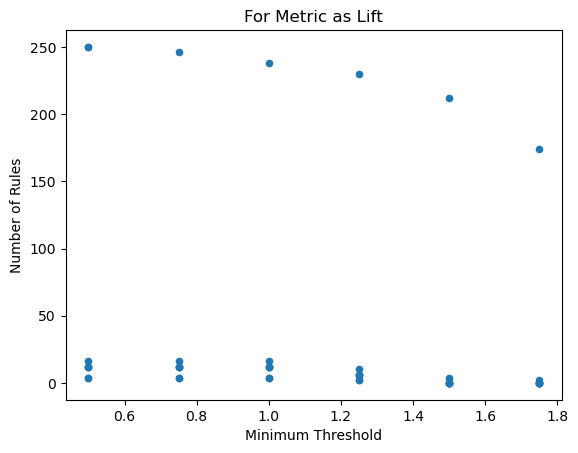

In [12]:
op_lift.plot(x = "Minimum Threshold", y = "Number of Rules", kind = 'scatter')
plt.title("For Metric as Lift")
plt.show()

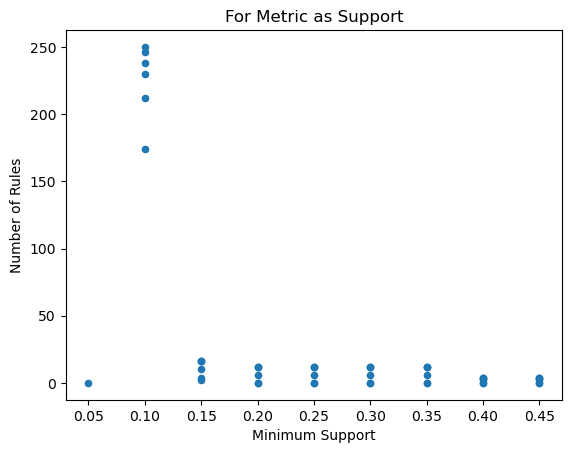

In [13]:
op_sup.plot(x = "Minimum Support", y = "Number of Rules", kind = 'scatter')
plt.title("For Metric as Support")
plt.show()

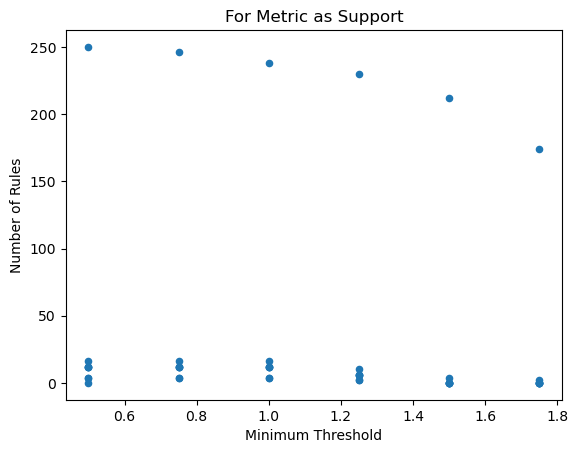

In [14]:
op_sup.plot(x = "Minimum Threshold", y = "Number of Rules", kind = 'scatter')
plt.title("For Metric as Support")
plt.show()